# 008: Evaluation of Fairness

In [2]:
import sys

import numpy as np
import seaborn as sns

sys.path.append("../")
from model_selection import cross_validation
from models import OrdinaryLeastSquares
from preprocessing import preprocess, get_raw_data
from visualizations import plot_class_distribution_by_group

%load_ext autoreload
%autoreload 2

# Class and label distributions

In [4]:
x_train_orig, x_test_orig, y_train_orig, train_ids, test_ids = get_raw_data()
race = x_train_orig[:, 245]
sex = x_train_orig[:, 50]
age = x_train_orig[:, 247]

Loading raw data...


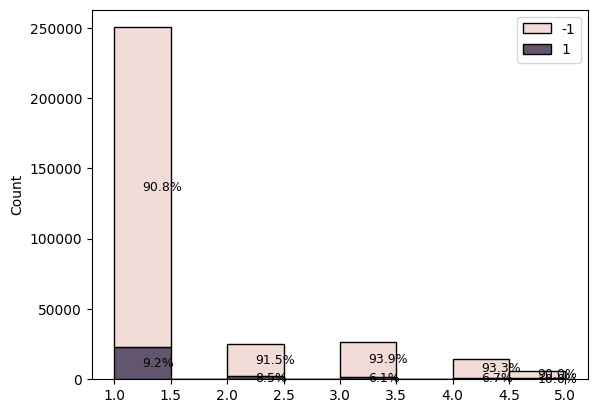

In [9]:
plot_class_distribution_by_group(y_train_orig, race)

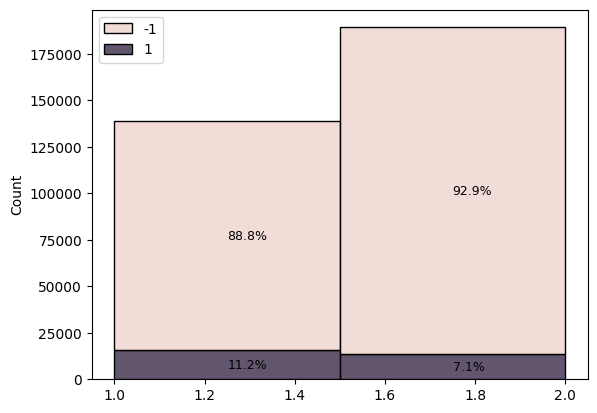

In [10]:
plot_class_distribution_by_group(y_train_orig, sex)

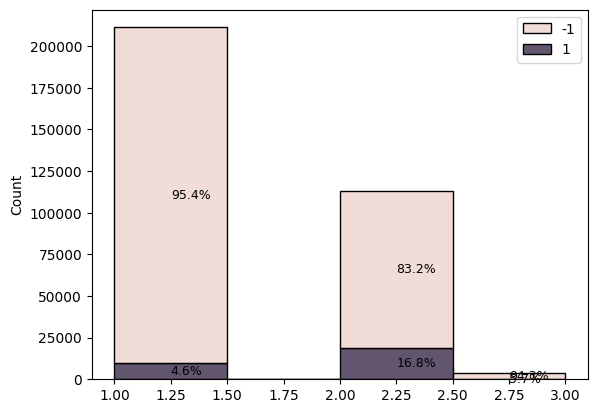

In [11]:
plot_class_distribution_by_group(y_train_orig, age)

In [12]:
x_train, _, y_train, *_ = preprocess()

Replacing missing value codes with np.nan...
Applying one-hot encoding...


In [13]:
def run_experiment(attr, num_samples = int(1e6)):
    return cross_validation(x_train[:num_samples], y_train[:num_samples], OrdinaryLeastSquares, scoring_groups=attr[:num_samples])

def print_results(results, value_names):
    latex = []
    latex.append("\\begin{table}[t]")
    latex.append("\\caption{Estimated performance metrics (\\%±STD) by protected attribute.}")
    latex.append("\\label{tab:results}")
    latex.append("\\centering")
    latex.append("\\begin{tabular}{lc}") # cc}")
    latex.append("\\toprule")
    latex.append("\\textbf{Attribute} & \\textbf{F1-score (\\%)}\\")# & \\textbf{F2-score (\\%)} & \\textbf{AUC-ROC (\\%)} \\\\")
    latex.append("\\midrule")
    for group in results.f1_scores[0].keys():
        f1_scores = [fold_result[group] for fold_result in results.f1_scores]
        f2_scores = [fold_result[group] for fold_result in results.f2_scores]
        aucrocs = [fold_result[group] for fold_result in results.auc_rocs]
        f1_mean, f1_std = np.mean(f1_scores) * 100, np.std(f1_scores) * 100
        f2_mean, f2_std = np.mean(f2_scores) * 100, np.std(f2_scores) * 100
        auc_mean, auc_std = np.mean(aucrocs) * 100, np.std(aucrocs) * 100

        latex.append(f"{value_names[group]} & {f1_mean:.1f}±{f1_std:.1f}\\\\")#  & {f2_mean:.1f}±{f2_std:.1f} & {auc_mean:.1f}±{auc_std:.1f} \\\\")
        # print(f"  F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
        # print(f"  F2 Score: {np.mean(f2_scores):.4f} ± {np.std(f2_scores):.4f}")
        # print(f"  AUC-ROC: {np.mean(aucrocs):.4f} ± {np.std(aucrocs):.4f}")
    latex.append("\\bottomrule")
    latex.append("\\end{tabular}")
    latex.append("\\end{table}")
    latex_table = "\n".join(latex)
    print(latex_table)

In [14]:
results = run_experiment(sex)
value_names = {"1.0": "Male", "2.0": "Female"}
print_results(results, value_names)

Starting fold 1/5 with 262508 samples
Condition number of X^T X: 9.30e+19
Condition number of X^T X: 4.48e+19
Starting fold 2/5 with 262508 samples
Condition number of X^T X: 2.58e+19
Condition number of X^T X: 6.65e+19
Starting fold 3/5 with 262508 samples
Condition number of X^T X: 1.64e+19
Condition number of X^T X: 6.65e+19
Starting fold 4/5 with 262508 samples
Condition number of X^T X: 2.91e+19
Condition number of X^T X: 8.42e+19
Starting fold 5/5 with 262508 samples
Condition number of X^T X: 6.18e+19
Condition number of X^T X: 3.75e+19
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)}\
\midrule
Male & 45.9±0.3\\
Female & 38.9±0.4\\
\bottomrule
\end{tabular}
\end{table}


In [15]:
results = run_experiment(race)
value_names = {"1.0": "White", "2.0": "Black", "3.0": "Hispanic", "4.0": "Other", "5.0": "Multiracial", "nan": "Unknown"}
print_results(results, value_names)

Starting fold 1/5 with 262508 samples
Condition number of X^T X: 9.30e+19
Condition number of X^T X: 4.48e+19
Starting fold 2/5 with 262508 samples
Condition number of X^T X: 2.58e+19
Condition number of X^T X: 6.65e+19
Starting fold 3/5 with 262508 samples
Condition number of X^T X: 1.64e+19
Condition number of X^T X: 6.65e+19
Starting fold 4/5 with 262508 samples
Condition number of X^T X: 2.91e+19
Condition number of X^T X: 8.42e+19
Starting fold 5/5 with 262508 samples
Condition number of X^T X: 6.18e+19
Condition number of X^T X: 3.75e+19
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)}\
\midrule
White & 43.2±0.5\\
Black & 39.1±1.3\\
Hispanic & 38.4±0.9\\
Other & 44.3±2.0\\
Multiracial & 49.9±4.3\\
Unknown & 43.8±4.8\\
\bottomrule
\end{tabular}
\end{table}


In [16]:
results = run_experiment(age)
value_names = {"1.0": "Under 65", "2.0": "Above 65", "3.0": "Unknown"}
print_results(results, value_names)

Starting fold 1/5 with 262508 samples
Condition number of X^T X: 9.30e+19
Condition number of X^T X: 4.48e+19
Starting fold 2/5 with 262508 samples
Condition number of X^T X: 2.58e+19
Condition number of X^T X: 6.65e+19
Starting fold 3/5 with 262508 samples
Condition number of X^T X: 1.64e+19
Condition number of X^T X: 6.65e+19
Starting fold 4/5 with 262508 samples
Condition number of X^T X: 2.91e+19
Condition number of X^T X: 8.42e+19
Starting fold 5/5 with 262508 samples
Condition number of X^T X: 6.18e+19
Condition number of X^T X: 3.75e+19
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)}\
\midrule
Under 65 & 36.6±0.5\\
Above 65 & 45.3±0.6\\
Unknown & 30.5±4.8\\
\bottomrule
\end{tabular}
\end{table}
